In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

import env
import os
import wrangle as w
import explore as e

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = w.wrangle_zillow()

this file exists, reading from csv


In [3]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633,296425,2005,6941.39,6037
6,3,4.0,1620,847770,2011,10244.94,6037
7,3,2.0,2077,646760,1926,7924.68,6037
11,0,0.0,1200,5328,1972,91.60,6037
14,0,0.0,171,6920,1973,255.17,6037


In [4]:
df.dtypes

bedroomcnt                        int64
bathroomcnt                     float64
calculatedfinishedsquarefeet      int64
taxvaluedollarcnt                 int64
yearbuilt                         int64
taxamount                       float64
fips                              int64
dtype: object

In [5]:
df = df.rename(columns={'bedroomcnt':'bedrooms',
                       'bathroomcnt':'bathrooms',
                       'calculatedfinishedsquarefeet':'area',
                       'taxvaluedollarcnt':'salesamount',
                       'fips':'county'})

In [6]:
df.county = df.county.map({6037:'LA', 6059:'Orange', 6111:'Ventura'})

In [7]:
df.sample(10)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
751713,4,3.0,2917,910205,1964,10206.22,Orange
832190,3,2.0,1783,827428,1931,9980.15,LA
1761154,4,3.0,2128,145548,1963,1951.51,LA
2042641,3,3.5,3940,1982783,1997,21845.58,Orange
2014569,3,1.0,1321,610498,1924,6777.97,LA
497274,4,2.0,2274,322232,1972,4135.34,LA
776974,4,3.0,2652,246643,1977,3105.94,LA
23438,4,3.0,2433,534455,1964,6595.52,LA
2093132,3,1.0,1249,283000,1941,4908.79,LA
1589079,3,2.0,1260,76575,1962,1253.18,LA


In [8]:
train, validate, test = w.splitting_data(df)

In [9]:
train.shape, validate.shape, test.shape

((1284141, 7), (428047, 7), (428047, 7))

In [10]:
train.sample(10)

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount,county
1492336,4,2.0,1512,253307,1955,3341.36,LA
1804271,2,1.0,918,274117,1956,3651.95,LA
1650817,4,3.0,2363,69128,1927,1070.04,LA
539383,3,1.0,1044,188470,1938,2492.79,LA
26233,4,2.0,1826,64151,1967,996.75,LA
993597,4,3.0,2861,499942,1951,5740.14,LA
1837119,3,2.0,1262,56690,1956,1004.51,LA
990885,3,2.0,1413,451456,1955,4745.92,Ventura
740450,3,2.0,1527,407931,1956,5244.50,Orange
1957501,4,2.5,2313,90735,1966,1614.22,Orange


In [11]:
train.dtypes

bedrooms         int64
bathrooms      float64
area             int64
salesamount      int64
yearbuilt        int64
taxamount      float64
county          object
dtype: object

In [12]:
zillow_corr = train.drop(columns='county').corr(method='spearman')
zillow_corr

,bedrooms,bathrooms,area,salesamount,yearbuilt,taxamount
bedrooms,1.000000,0.634233,0.655474,0.295250,0.425741,0.296697
bathrooms,0.634233,1.000000,0.826175,0.481949,0.569716,0.481522
area,0.655474,0.826175,1.000000,0.523634,0.511892,0.521115
salesamount,0.295250,0.481949,0.523634,1.000000,0.289844,0.978536
yearbuilt,0.425741,0.569716,0.511892,0.289844,1.000000,0.288215
taxamount,0.296697,0.481522,0.521115,0.978536,0.288215,1.000000


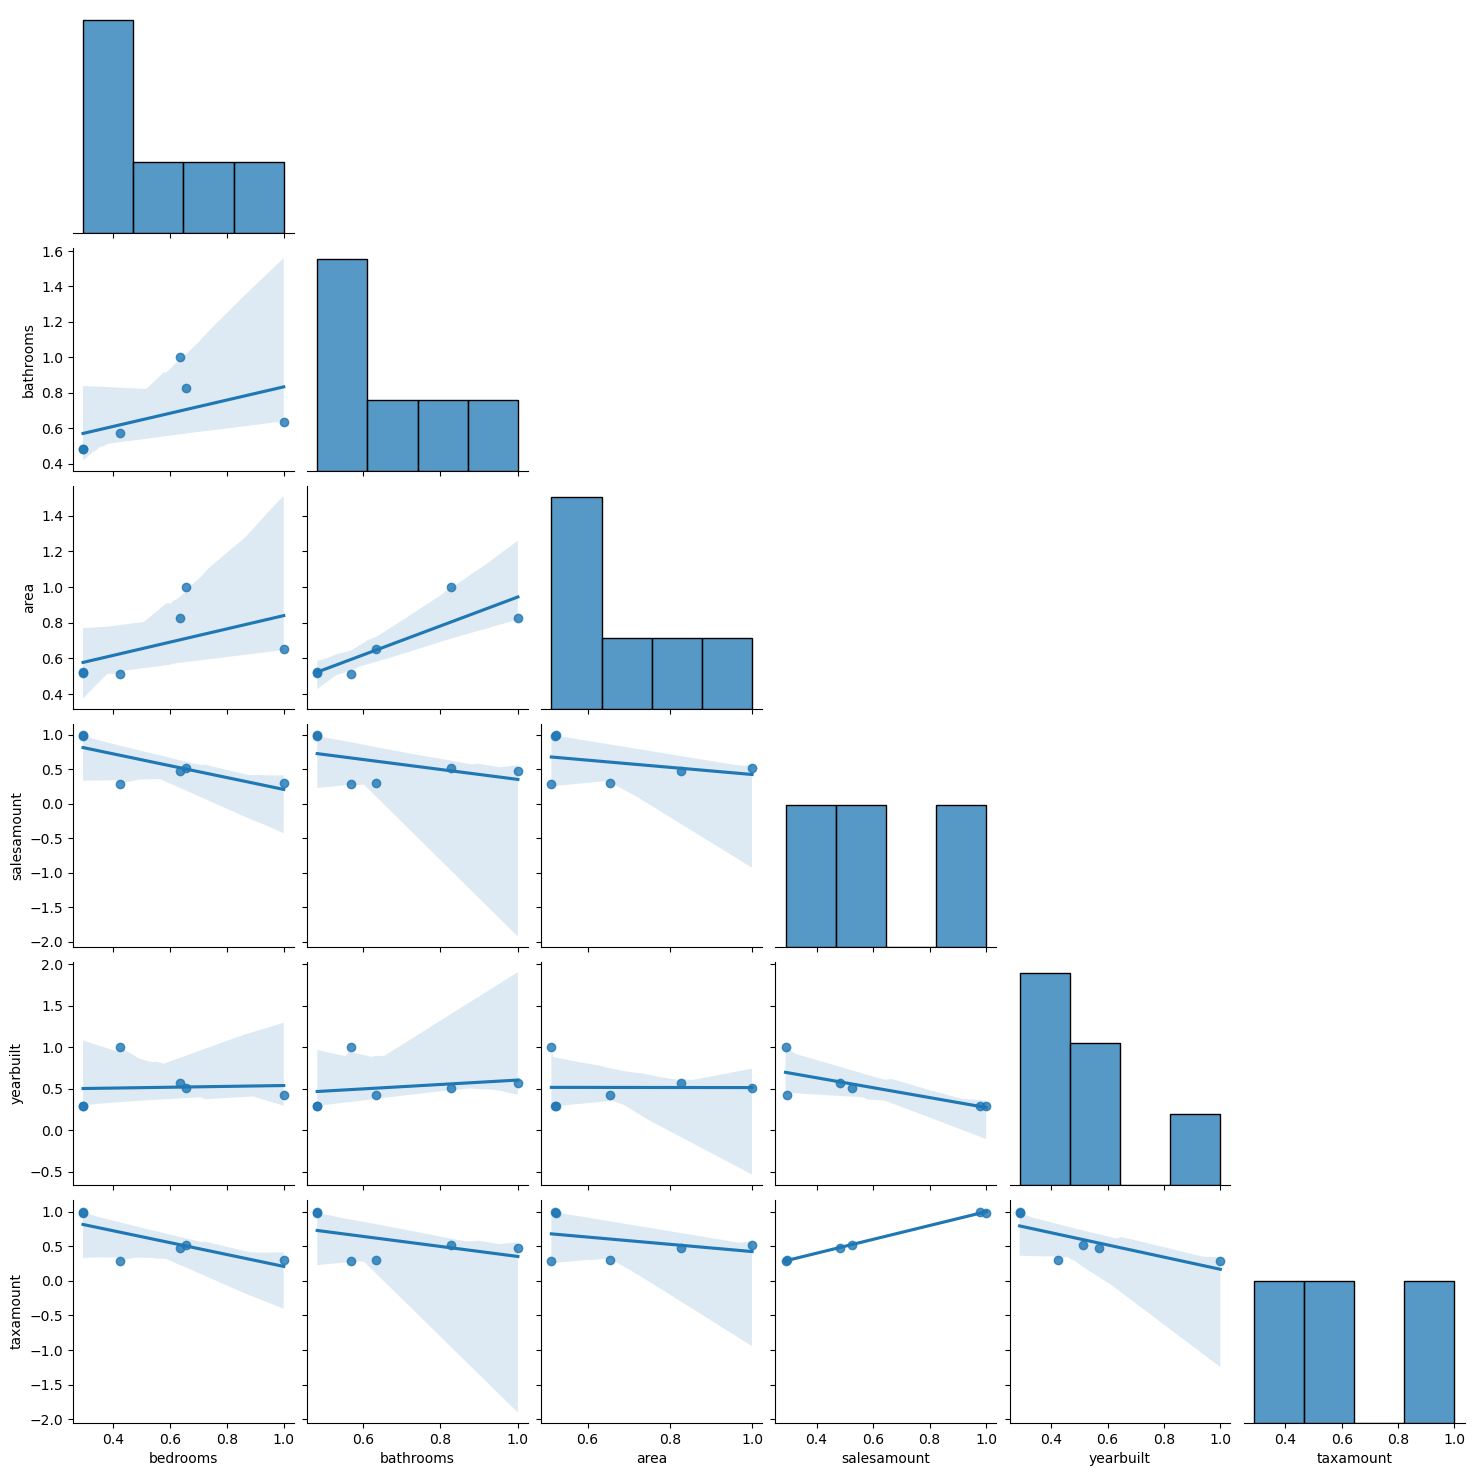

In [14]:
def plot_variable_pairs(df):
    """
    Generate a pair plot for visualizing relationships between numerical variables in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The input DataFrame containing numerical variables.

    Returns:
    - None (Displays the pair plot)

    Example:
    plot_variable_pairs(df)

    This function uses Seaborn's pairplot to create scatterplots for each pair of numerical variables in the DataFrame.
    The diagonal shows the distribution of each variable, and the scatterplots show the relationships between pairs of variables.
    Additionally, a linear regression line is fit to each scatterplot to visualize trends.

    Args:
    - df (pd.DataFrame): The input DataFrame containing numerical variables.

    Returns:
    - None (Displays the pair plot)

    """
    sns.pairplot(data=df, kind='reg', corner=True)
    return plt.show()
plot_variable_pairs(zillow_corr)

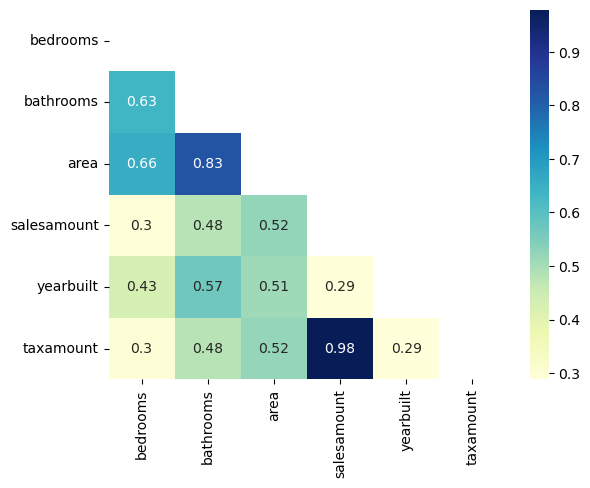

In [15]:
sns.heatmap(zillow_corr, cmap='YlGnBu', annot=True, mask=np.triu(zillow_corr))
plt.show()

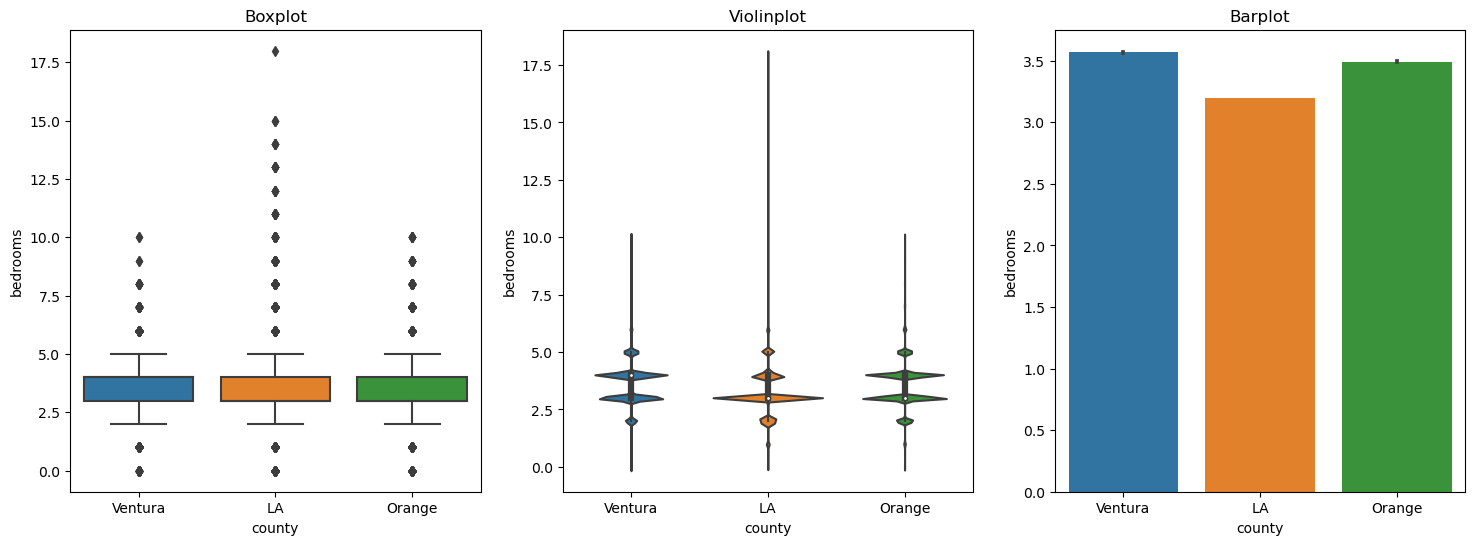

In [16]:
def plot_categorical_and_continuous_vars (df, cat_col, cont_col):
    """
    Generate three different plots for visualizing the relationship between a categorical variable and a continuous variable.

    Parameters:
    - train (pd.DataFrame): The input DataFrame containing the data.
    - cat_col (str): The name of the categorical column.
    - cont_col (str): The name of the continuous column.

    Returns:
    - None (Displays the plots)

    Example:
    plot_categorical_and_continuous_vars(train, 'county', 'bedrooms')

    This function creates three different plots to visualize the relationship between a categorical variable and a continuous variable:
    1. Boxplot: Displays the distribution of the continuous variable for each category.
    2. Violinplot: Similar to a boxplot but provides additional information about the distribution.
    3. Barplot: Displays the average or aggregated value of the continuous variable for each category.

    Args:
    - train (pd.DataFrame): The input DataFrame containing the data.
    - cat_col (str): The name of the categorical column.
    - cont_col (str): The name of the continuous column.

    Returns:
    - None (Displays the plots)

    """
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    sns.boxplot(x=cat_col, y=cont_col, data=df, ax=axes[0])
    axes[0].set_title('Boxplot')

    sns.violinplot(x=cat_col, y=cont_col, data=df, ax=axes[1])
    axes[1].set_title('Violinplot')

    sns.barplot(x=cat_col, y=cont_col, data=df, ax=axes[2])
    axes[2].set_title('Barplot')
    
    return plt.show()

plot_categorical_and_continuous_vars(train, 'county', 'bedrooms')

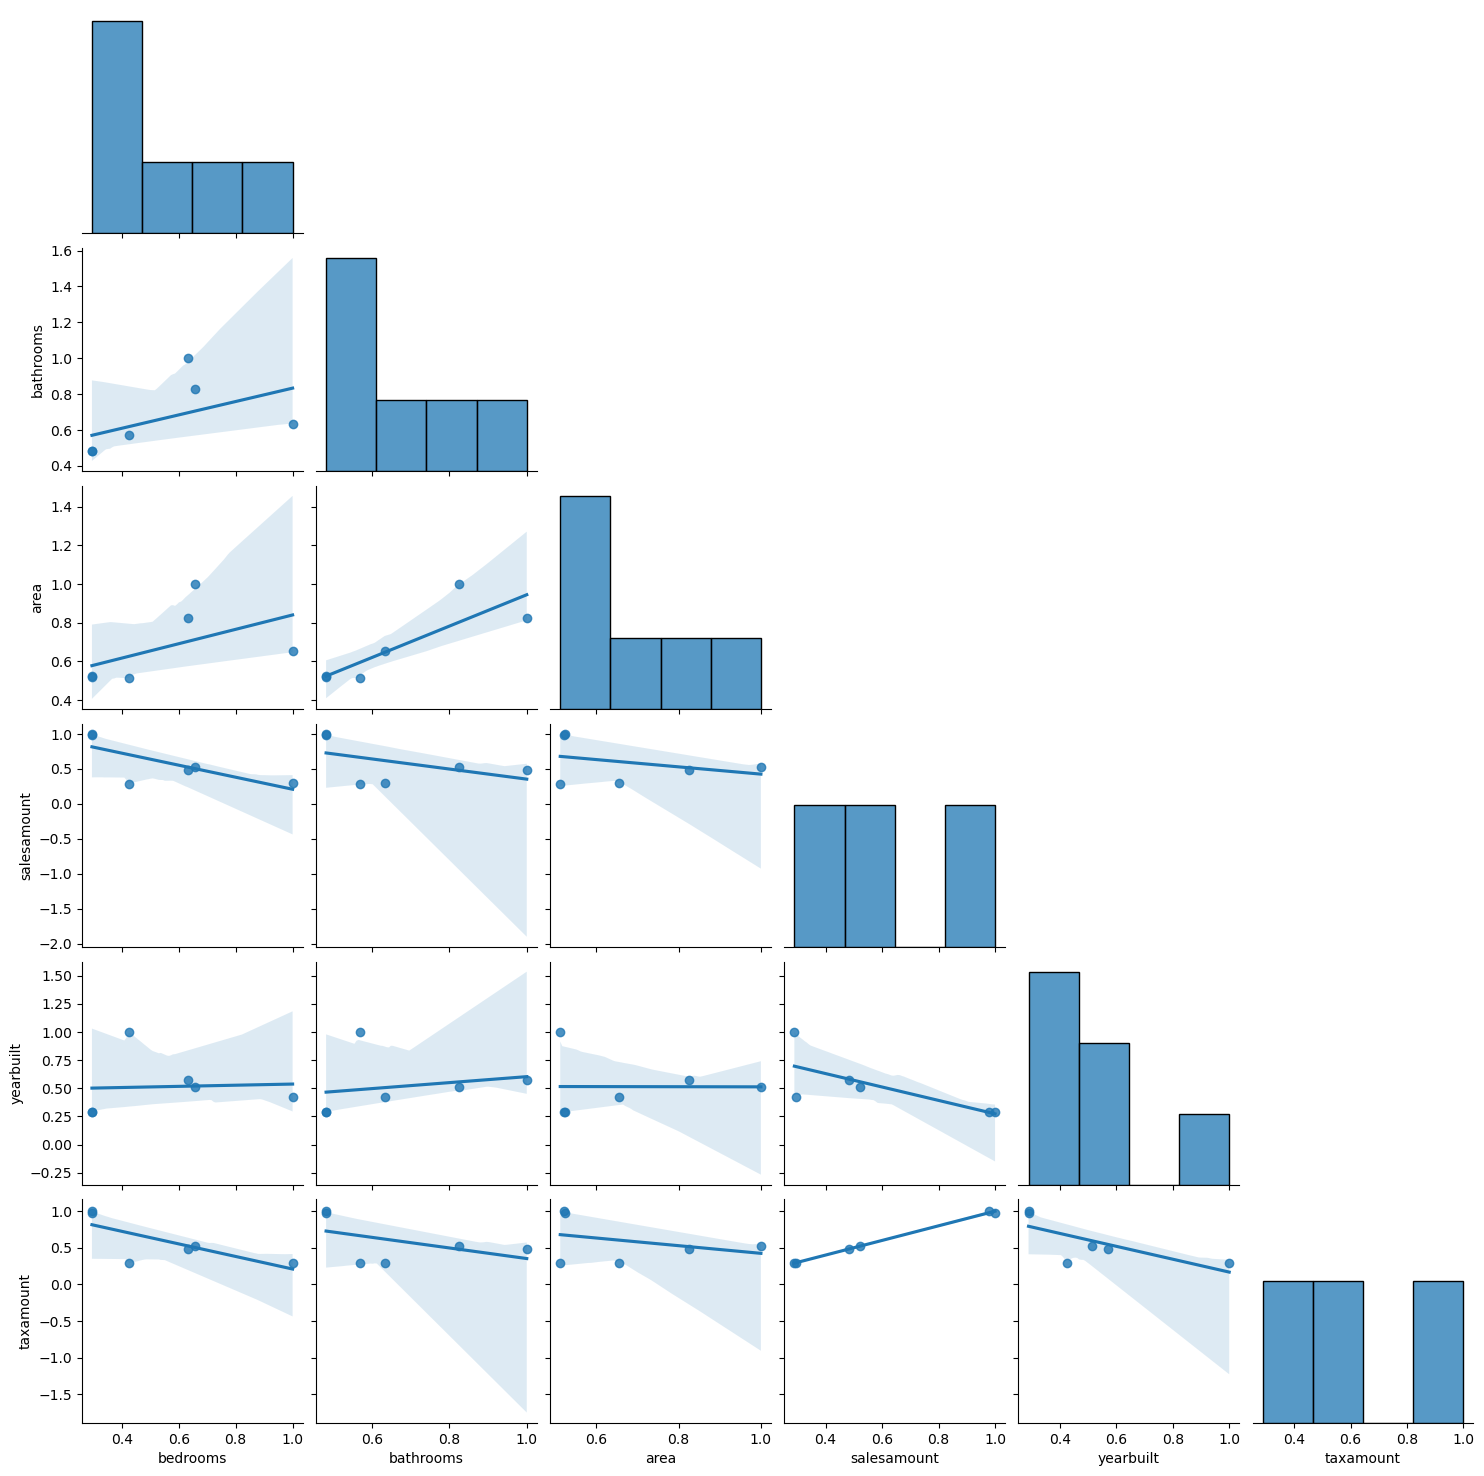

In [17]:
e.plot_variable_pairs(zillow_corr)

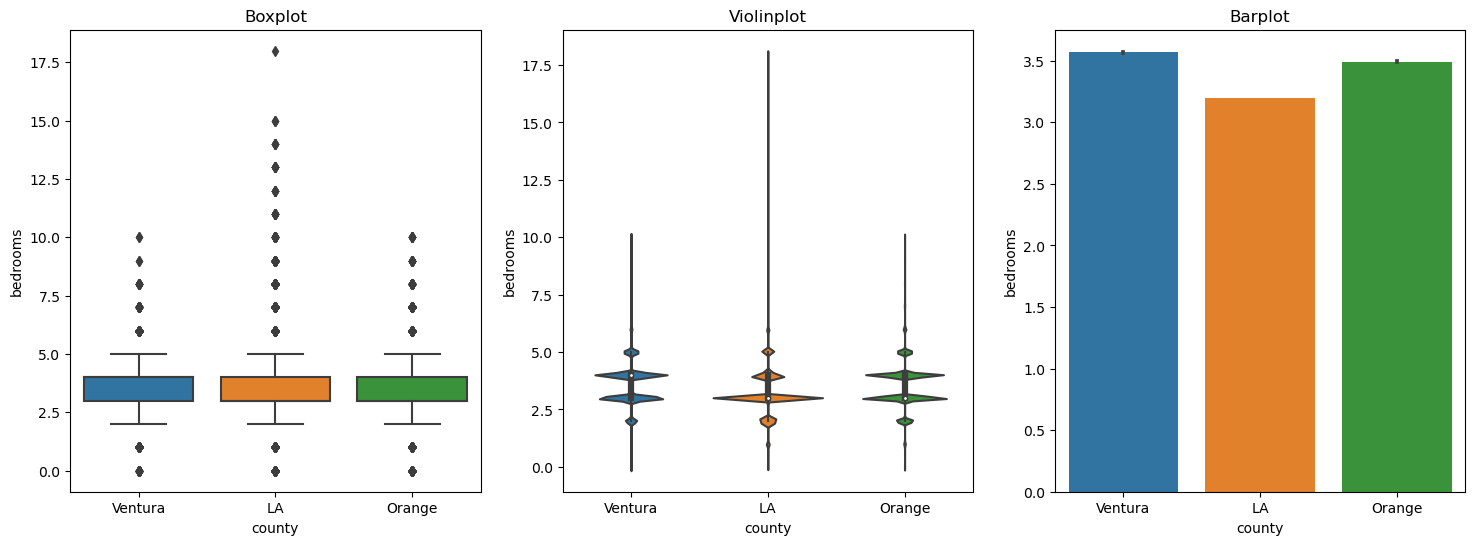

In [19]:
e.plot_categorical_and_continuous_vars(train, 'county', 'bedrooms')

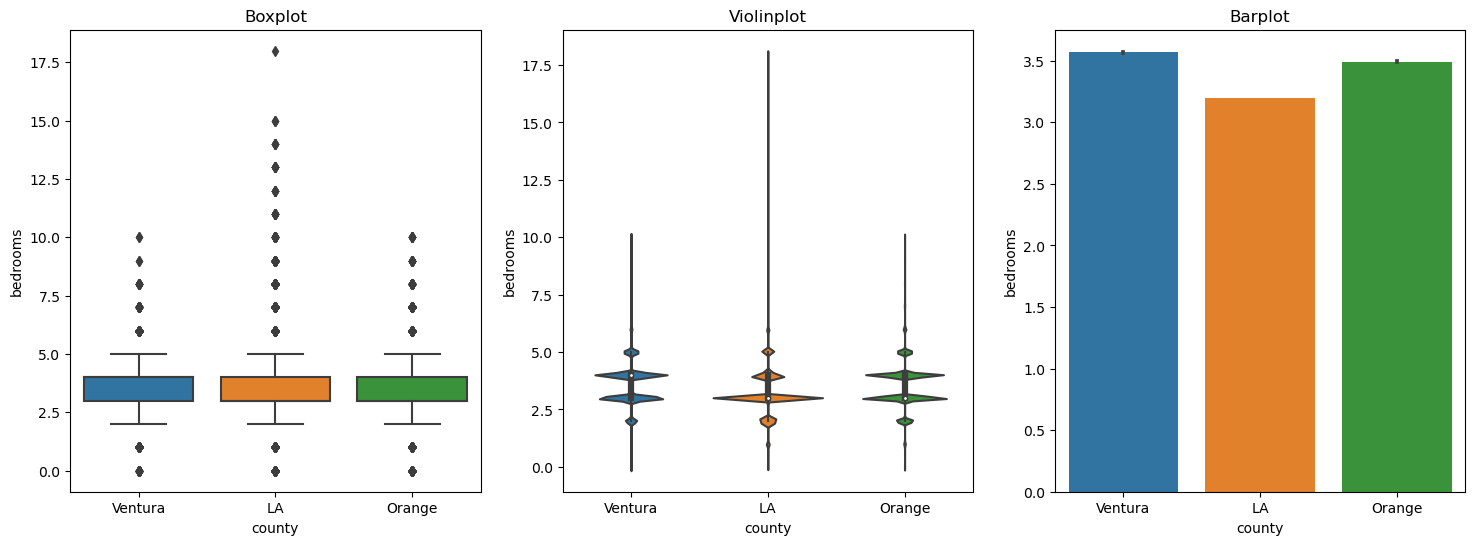

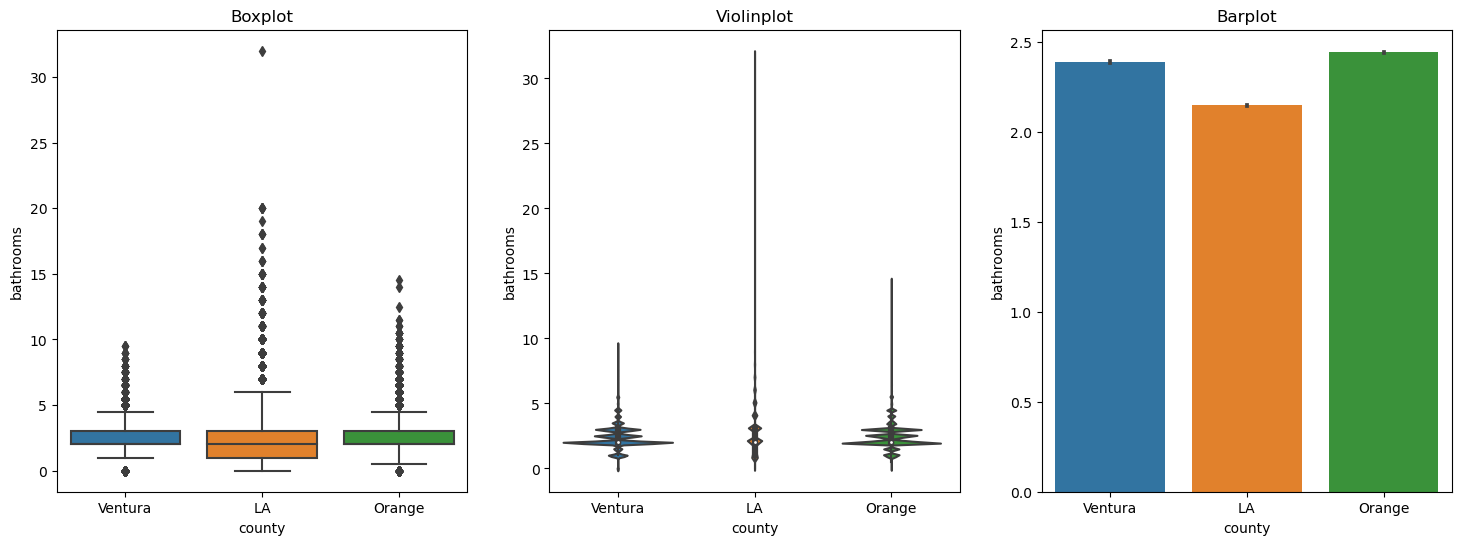

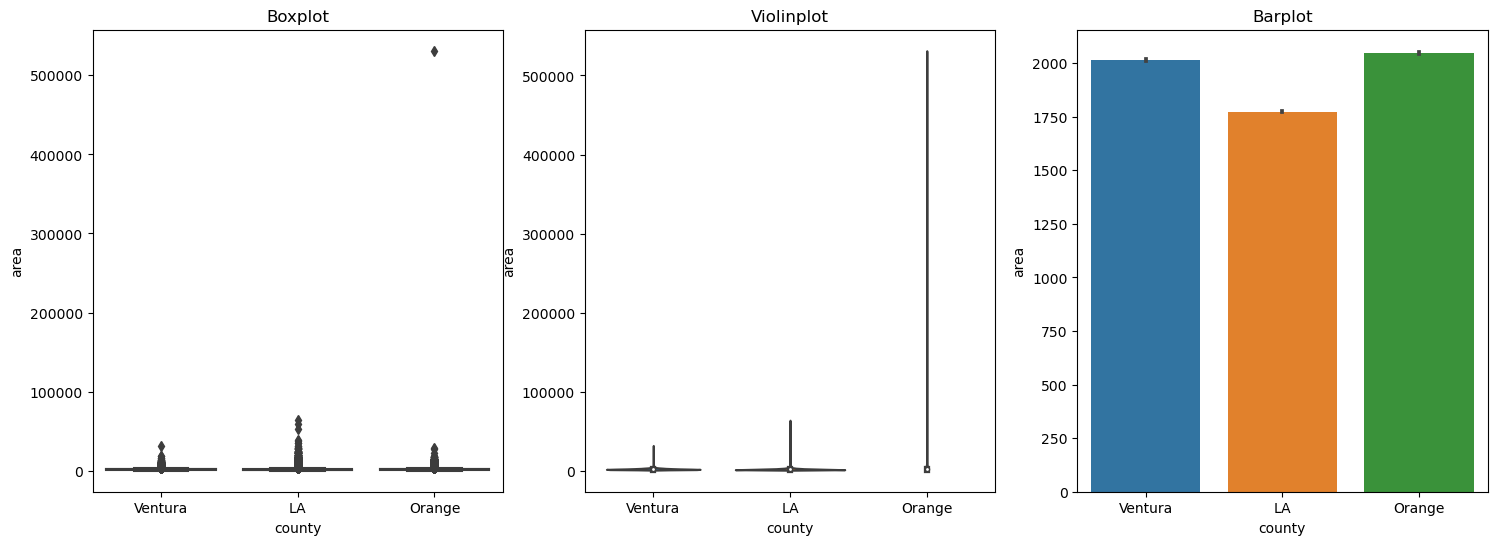

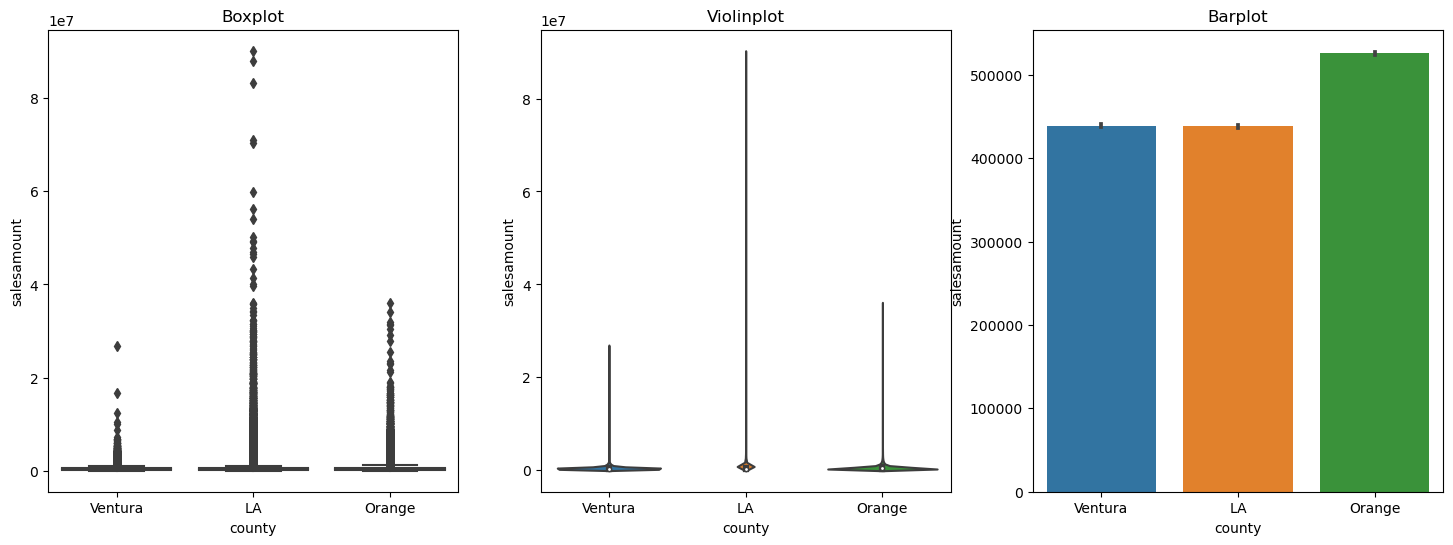

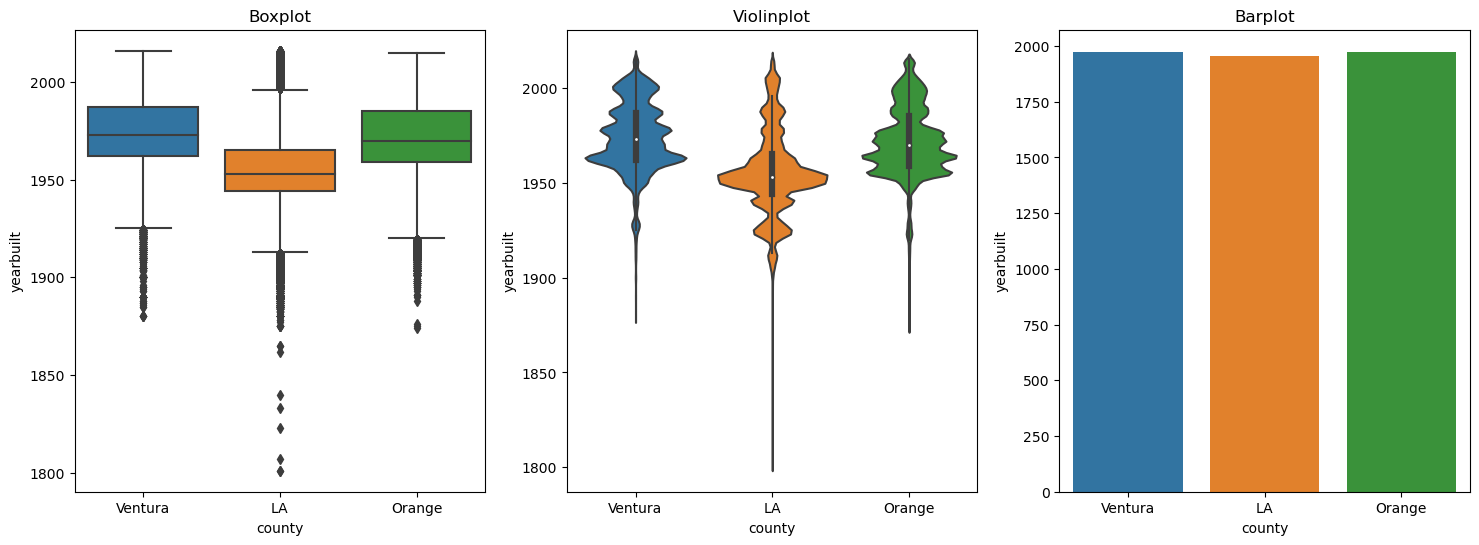

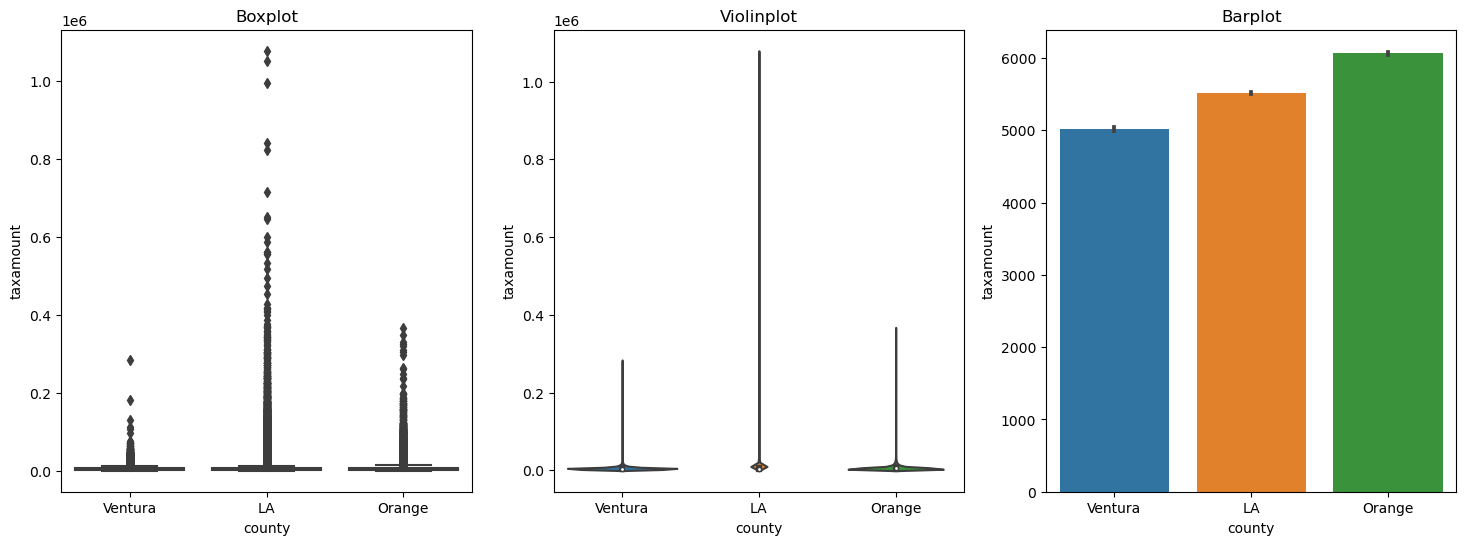

In [20]:
cols = train.drop(columns='county').columns
for col in cols:
    e.plot_categorical_and_continuous_vars(train, train.county, col)

### Hypothesis

$H_0$: there is no linear correlation between property value and area
    
$H_a$: there is an linear correlation between property value and area
    
α = 0.05

In [23]:
from scipy.stats import spearmanr

# Assuming 'train' is your dataframe and 'salesamount' is the property value column
property_value_column = 'salesamount'

# Get continuous columns (excluding 'property_value')
continuous_columns = [col for col in train.columns if train[col].dtype != 'category' and col != property_value_column]

# Calculate Spearman's correlation for each continuous variable with 'property_value'
for col in continuous_columns:
    spearman_corr, p_value = spearmanr(train[col], train[property_value_column])
    print(f"Spearman's correlation coefficient between '{col}' and 'salesamount': {spearman_corr}")
    print(f"P-value: {p_value}")
    print('\n')

Spearman's correlation coefficient between 'bedrooms' and 'salesamount': 0.29525017456958363
P-value: 0.0


Spearman's correlation coefficient between 'bathrooms' and 'salesamount': 0.48194885640686164
P-value: 0.0


Spearman's correlation coefficient between 'area' and 'salesamount': 0.5236338961752631
P-value: 0.0


Spearman's correlation coefficient between 'yearbuilt' and 'salesamount': 0.289844387805378
P-value: 0.0


Spearman's correlation coefficient between 'taxamount' and 'salesamount': 0.9785359758073234
P-value: 0.0


Spearman's correlation coefficient between 'county' and 'salesamount': 0.15001985962596612
P-value: 0.0


